# **Team 5: Universal Basic Income**
### **Authors: Lamya Alzahrani**

#### In this notebook, we will be mainly analyzing the census data to find an answer to this question: *How many people / individuals / families are significantly below the poverty line?*


Datasets i will be using: 
  - Census income brackets/poverty line data: https://data.census.gov/table?q=DP03


# Number of families significantly under the poverty line

### Part 1: Read and clean the data

In [261]:
import pandas as pd

# Read the CSV file
file_path = 'Boston-Poverty-Data.csv'
df = pd.read_csv(file_path, index_col=0)  # Use first column as index

# Set the index column name to None
df.index.name = None

# Clean up the index by removing whitespace and special characters
df.index = df.index.str.strip().str.replace('\W+', ' ').str.replace('to', '-').str.replace('Lessthan', '<')
df = df.replace('(X)', 0)

# Convert values to floats, removing commas and percentage signs
df = df.apply(lambda x: x.str.replace('%', '').str.replace('±', '').str.replace(',', '').astype(float), axis=1)

# Rename columns to be more comprehensive and clear
column_names = {
    'Boston city, Massachusetts!!Households!!Estimate': 'Households_Estimate',
    'Boston city, Massachusetts!!Households!!Margin of Error': 'Households_Margin_of_Error',
    'Boston city, Massachusetts!!Families!!Estimate': 'Families_Estimate',
    'Boston city, Massachusetts!!Families!!Margin of Error': 'Families_Margin_of_Error',
    'Boston city, Massachusetts!!Married-couple families!!Estimate': 'Married_couple_Families_Estimate',
    'Boston city, Massachusetts!!Married-couple families!!Margin of Error': 'Married_couple_Families_Margin_of_Error',
    'Boston city, Massachusetts!!Nonfamily households!!Estimate': 'Nonfamily_Households_Estimate',
    'Boston city, Massachusetts!!Nonfamily households!!Margin of Error': 'Nonfamily_Households_Margin_of_Error'
}
df = df.rename(columns=column_names)

df.head()


/var/folders/8b/km60hn1x3z5gfpgf1q_d5lmw0000gn/T/ipykernel_29351/4011192515.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.strip().str.replace('\W+', ' ').str.replace('to', '-').str.replace('Lessthan', '<')


,Households_Estimate,Households_Margin_of_Error,Families_Estimate,Families_Margin_of_Error,Married_couple_Families_Estimate,Married_couple_Families_Margin_of_Error,Nonfamily_Households_Estimate,Nonfamily_Households_Margin_of_Error
Total,271941.0,4553.0,121536.0,4704.0,74624.0,4000.0,150405.0,4738.0
Less than 10 000,9.5,1.0,5.7,1.1,2.4,1.1,12.8,1.6
10 000 - 14 999,6.2,0.9,3.9,1.1,1.9,0.9,8.1,1.2
15 000 - 24 999,6.4,0.8,6.4,1.4,3.3,1.3,6.6,1.0
25 000 - 34 999,5.7,0.7,5.5,1.2,3.7,1.3,6.0,0.9


### Section 2: Calculate the number of families in the bottom 5%, 10%, and 15% of families under the poverty line

In [262]:
df.index = ['Total', 'Less_than_10000', '10000_to_14999', '15000_to_24999', '25000_to_34999'] + ['Row_' + str(i) for i in range(5, 17)]

# Find the total number of families
total_families = df.loc['Total', 'Families_Estimate']

# Calculate the number of families in each income bracket under the poverty line
families_less_than_10000 = total_families * df.loc['Less_than_10000', 'Families_Estimate'] / 100
families_10000_to_14999 = total_families * df.loc['10000_to_14999', 'Families_Estimate'] / 100
families_15000_to_24999 = total_families * df.loc['15000_to_24999', 'Families_Estimate'] / 100

# Calculate the number of families in the bottom 5%, 10%, and 15% income brackets
bottom_5_percent = families_less_than_10000.round()
bottom_10_percent = families_10000_to_14999.round()
bottom_15_percent = families_15000_to_24999.round()

print("Number of families in the bottom 5% income bracket:", bottom_5_percent)
print("Number of families in the bottom 10% income bracket:", bottom_10_percent)
print("Number of families in the bottom 15% income bracket:", bottom_15_percent)


Number of families in the bottom 5% income bracket: 6928.0
Number of families in the bottom 10% income bracket: 4740.0
Number of families in the bottom 15% income bracket: 7778.0


### Part 3: Plot the results

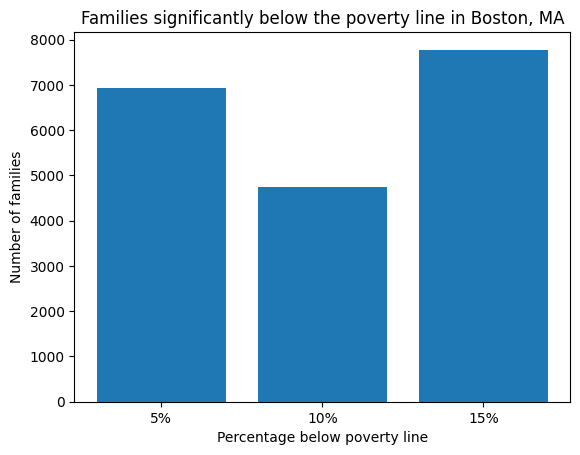

In [263]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(['5%', '10%', '15%'], [bottom_5_percent, bottom_10_percent, bottom_15_percent])
ax.set_ylabel('Number of families')
ax.set_xlabel('Percentage below poverty line')
ax.set_title('Families significantly below the poverty line in Boston, MA')
plt.show()


 It is interesting to note that the number of families in the bottom 15% income bracket is higher than that in the bottom 5% or 10% brackets, which could indicate a larger wealth gap in the city. Additionally, the data shows that nearly 8,000 families are in the bottom 15% income bracket, which is a significant number, highlighting the need for poverty alleviation measures in the area.

 The fact that the number of families in the bottom 15% income bracket is higher than the bottom 5% or 10% brackets suggests that there is a significant concentration of poverty among families who are slightly above the poverty line but still struggling to make ends meet. This could indicate a larger wealth gap in the city, where families in the lower middle-class are disproportionately affected by poverty.

# Population by Poverty by Racial Group in Boston

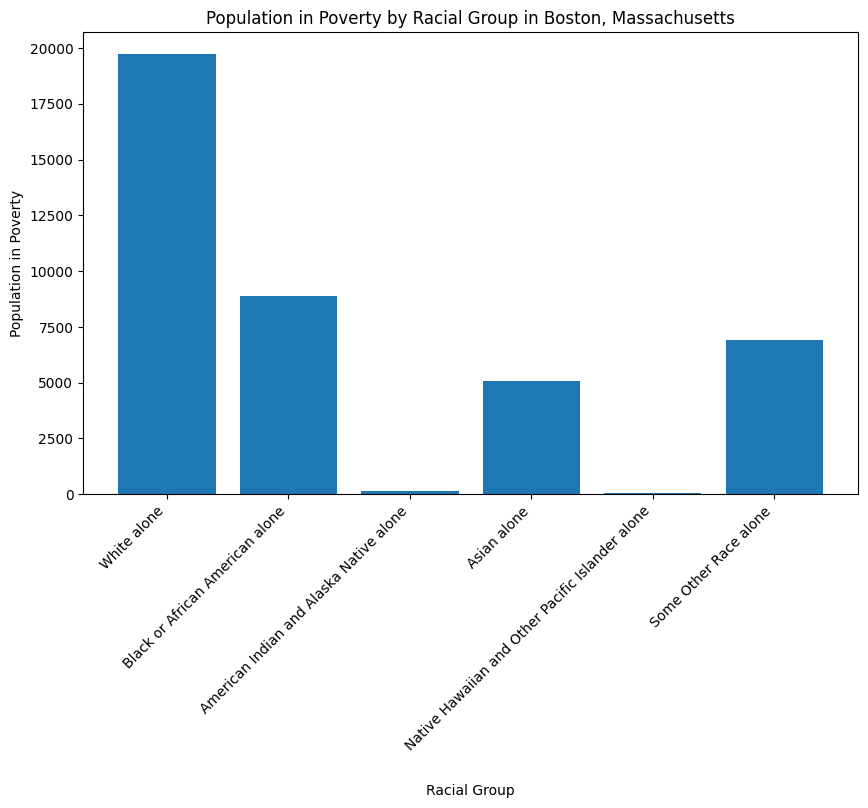

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
racial_demographics = pd.read_csv("Population_Racial_Demographics_Boston_MA.csv")
poverty_data = pd.read_csv("Boston-Poverty-Data.csv")

# Extract the relevant data
race_data = racial_demographics.loc[2:7, ["Label (Grouping)", "Boston city, Massachusetts"]]
race_data.columns = ["Race", "Population"]
race_data["Population"] = race_data["Population"].str.replace(',', '').astype(int)
race_data

# Extract the relevant data
income_brackets = poverty_data.loc[1:10, ["Label (Grouping)", "Boston city, Massachusetts!!Households!!Estimate"]]
income_brackets.columns = ["Income Bracket", "Percentage"]
income_brackets["Percentage"] = income_brackets["Percentage"].str.rstrip('%').astype(float)
income_brackets

# Merge race data and income brackets
merged_data = pd.merge(race_data, income_brackets, left_index=True, right_index=True)
merged_data["Percentage"] = merged_data["Percentage"] / 100
merged_data["Population in Poverty"] = (merged_data["Population"] * merged_data["Percentage"]).astype(int)
merged_data

# Plot the population in poverty for each racial group
plt.figure(figsize=(10, 6))
plt.bar(merged_data["Race"], merged_data["Population in Poverty"])
plt.xlabel("Racial Group")
plt.ylabel("Population in Poverty")
plt.title("Population in Poverty by Racial Group in Boston, Massachusetts")
plt.xticks(rotation=45, ha="right")

plt.show()


# Boston Poverty Rate by houshold income

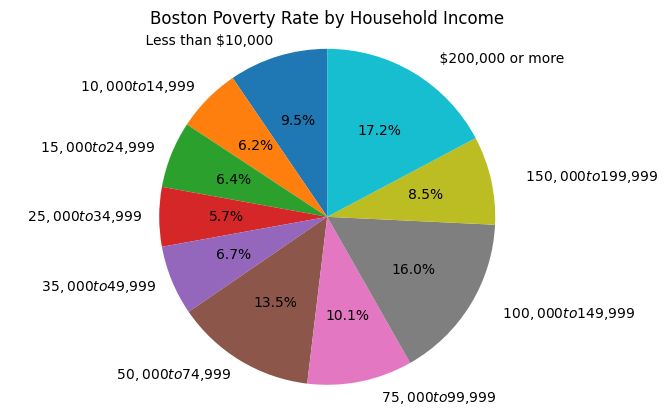

In [265]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "Boston-Poverty-Data.csv"

data = pd.read_csv(filename)

# Extract poverty rate data by household income
poverty_by_income = data.loc[1:10, ["Label (Grouping)", "Boston city, Massachusetts!!Households!!Estimate"]]
poverty_by_income.columns = ["Income", "Percentage"]
poverty_by_income["Percentage"] = poverty_by_income["Percentage"].str.rstrip('%').astype(float)

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(poverty_by_income["Percentage"], labels=poverty_by_income["Income"], autopct="%1.1f%%", startangle=90)
ax.axis("equal")

plt.title("Boston Poverty Rate by Household Income")
plt.show()
